# Demo of interpilation.py
## 1.Curve shape comparison

In [3]:
import interpolation as intp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
grids = [1,2,3,4, 5]
dfs = [0.993, 0.98,0.97,0.95, 0.94]

ts = np.arange(0, 5, 1./365.)

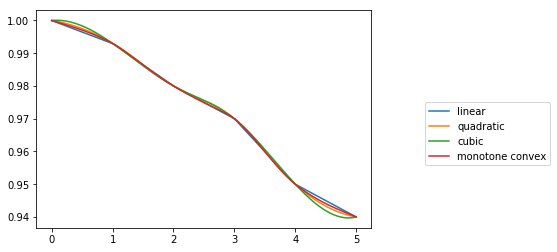

In [8]:
df_linear = intp.log_linear(ts, grids, dfs)
df_quadratic = intp.log_quadratic(ts, grids, dfs)
df_cubic = intp.log_cubic(ts, grids, dfs)
df_mc = intp.monotone_convex(ts, grids, dfs)
plt.plot(ts, df_linear, label = 'linear')
plt.plot(ts, df_quadratic, label = 'quadratic')
plt.plot(ts, df_cubic, label = 'cubic')
plt.plot(ts, df_mc, label = 'monotone convex')
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.5, .100))
plt.show()

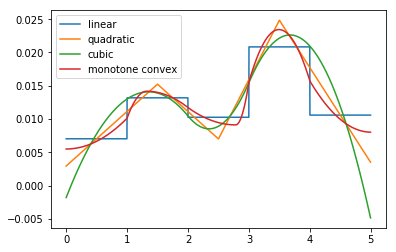

In [9]:
fwd_linear = -np.log(df_linear[1:] / df_linear[:-1]) / (ts[1:] - ts[:-1])
fwd_quadratic = -np.log(df_quadratic[1:] / df_quadratic[:-1]) / (ts[1:] - ts[:-1])
fwd_cubic = -np.log(df_cubic[1:] / df_cubic[:-1]) / (ts[1:] - ts[:-1])
fwd_mc = -np.log(df_mc[1:] / df_mc[:-1]) / (ts[1:] - ts[:-1])
plt.plot(ts[:-1], fwd_linear, label = 'linear')
plt.plot(ts[:-1], fwd_quadratic, label = 'quadratic')
plt.plot(ts[:-1], fwd_cubic, label = 'cubic')
plt.plot(ts[:-1], fwd_mc, label = 'monotone convex')
plt.legend()
plt.show()

## 2. Calibration of curve

In [1]:
import scipy.optimize as so
import time

In [4]:
grids = np.array([1,2,3,4,5, 6, 7, 8, 9, 10])
discount_factors = np.array([0.993, 0.98,0.97,0.95, 0.94, 0.93, 0.92, 0.91,0.9, 0.89])

end_dates = np.array([1,2,3,4,5, 6, 7, 8, 9, 10])
swap_rates = [0.01, 0.012, 0.015, 0.015, 0.017, 0.018, 0.018, 0.019, 0.019, 0.02]

### calibration

In [6]:
t0 = time.time()
interp = intp.monotone_convex
loss = lambda dfs: np.sum(np.power(-np.log(interp(end_dates, grids, dfs)) / end_dates- swap_rates, 2))
print('before calib :', loss(discount_factors))
param = so.minimize(loss,
                    discount_factors,
                    tol = 1e-6)
t1 = time.time()
print('after calib :', loss(param.x))
print('time :', t1 - t0)
print('df :', param.x)
ts = np.arange(0, 10, 1/365)
df_calib = interp(ts, grids, param.x)
print('calib :', -np.log(interp(end_dates, grids, param.x)) / end_dates)



before calib : 0.0003088726907918984
after calib : 1.6650164408578616e-11
time : 0.1301250457763672
df : [0.99004985 0.97628563 0.95599736 0.94176495 0.91851103 0.89763192
 0.88160192 0.85900632 0.84280585 0.81873552]
calib : [0.00999999 0.01200004 0.01500004 0.01499989 0.01700027 0.0179992
 0.0180021  0.01899737 0.01900207 0.01999942]


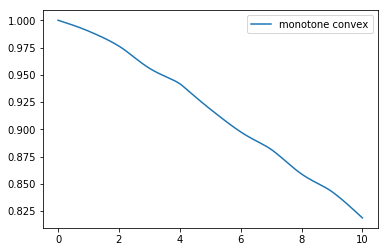

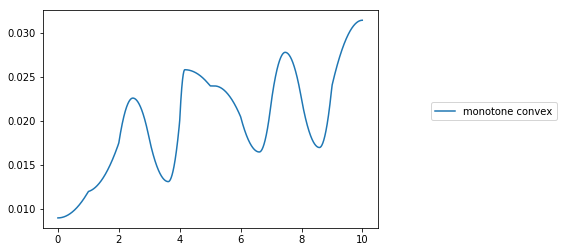

In [7]:
fwd_calib = -np.log(df_calib[1:] / df_calib[:-1]) / (ts[1:] - ts[:-1])
plt.plot(ts, df_calib, label = 'monotone convex')
plt.legend()
plt.show()
plt.plot(ts[:-1], fwd_calib, label = 'monotone convex')
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.5, .100))
plt.show()
